# Feature Description

#### Features - 1
- *amount_tsh* - Total static head (amount water available to waterpoint)
- *date_recorded* - The date the row was entered
- ***funder* - Who funded the well**
- ***gps_height* - Altitude of the well**
- ***installer* - Organization that installed the well**
- ***longitude* - GPS coordinate**
- ***latitude* - GPS coordinate**
- *wpt_name* - Name of the waterpoint if there is one
- *num_private* -
- ***basin* - Geographic water basin**
___
#### Geographic Location
- *subvillage* - Geographic location
- *region* - Geographic location
- *region_code* - Geographic location (coded)
- *district_code* - Geographic location (coded)
- *lga* - Geographic location
- *ward* - Geographic location
___
#### Features - 2
- ***population* - Population around the well**
- *public_meeting* - True/False
- ***recorded_by* - Group entering this row of data**
- ***scheme_management* - Who operates the waterpoint**
- *scheme_name* - Who operates the waterpoint
- ***permit* - If the waterpoint is permitted**
- ***construction_year* - Year the waterpoint was constructed**
___
#### Water Extraction
- *extraction_type* - The kind of extraction the waterpoint uses
- *extraction_type_group* - The kind of extraction the waterpoint uses
- *extraction_type_class* - The kind of extraction the waterpoint uses
___
#### Features - 3
- *management* - How the waterpoint is managed
- *management_group* - How the waterpoint is managed
- *payment* - What the water costs
- *payment_type* - What the water costs
- *water_quality* - The quality of the water
- *quality_group* - The quality of the water
- *quantity* - The quantity of water
- *quantity_group* - The quantity of water
- *source* - The source of the water
- *source_type* - The source of the water
- *source_class* - The source of the water
- *waterpoint_type* - The kind of waterpoint
- *waterpoint_type_group* - The kind of waterpoint

# Setup

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [130]:
PIT_data_df = pd.read_csv('/content/Pump it Up - Training set Values.csv')
PIT_label_df = pd.read_csv('/content/Pump it Up - Training set Labels.csv')
merged_PIT_df = pd.merge(PIT_data_df, PIT_label_df,how='inner', on='id')
merged_PIT_df.loc[merged_PIT_df.latitude.abs() < 0.0001, 'latitude'] = 0.0

# Feature Characteristics Identification

In [131]:
PIT_feature_info_df = pd.DataFrame(merged_PIT_df.columns, columns=['feature'])
PIT_feature_info_df = pd.merge(PIT_feature_info_df, pd.DataFrame(merged_PIT_df.isna().sum(), columns=['null_count']),how='inner',left_on='feature',right_index=True)
PIT_feature_info_df = pd.merge(PIT_feature_info_df, pd.DataFrame(merged_PIT_df.dtypes, columns=['data_type']),how='inner',left_on='feature',right_index=True)
PIT_feature_info_df = pd.merge(PIT_feature_info_df, pd.DataFrame((merged_PIT_df == 0).sum(axis=0), columns=['zero_count']),how='inner',left_on='feature',right_index=True)
PIT_feature_info_df = pd.merge(PIT_feature_info_df, pd.DataFrame(merged_PIT_df.nunique(), columns=['unique_val_count']),how='inner',left_on='feature',right_index=True)
PIT_feature_info_df

,feature,null_count,data_type,zero_count,unique_val_count
0,id,0,int64,1,59400
1,amount_tsh,0,float64,41639,98
2,date_recorded,0,object,0,356
3,funder,3635,object,0,1897
4,gps_height,0,int64,20438,2428
5,installer,3655,object,0,2145
6,longitude,0,float64,1812,57516
7,latitude,0,float64,1812,57517
8,wpt_name,0,object,0,37400
9,num_private,0,int64,58643,65


In [132]:
merged_PIT_df['gps_height'] = merged_PIT_df['gps_height'].replace(0,np.nan).fillna(merged_PIT_df.groupby('region')['gps_height'].transform('mean'))
merged_PIT_df['longitude'] = merged_PIT_df['longitude'].replace(0,np.nan).fillna(merged_PIT_df.groupby('region')['longitude'].transform('median'))
merged_PIT_df['latitude'] = merged_PIT_df['latitude'].replace(0,np.nan).fillna(merged_PIT_df.groupby('region')['latitude'].transform('median'))
merged_PIT_df['population'] = merged_PIT_df['population'].replace(0,np.nan).fillna(merged_PIT_df.groupby('region')['population'].transform('mean'))

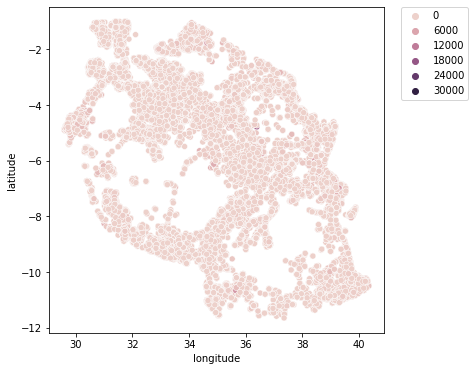

In [136]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = cat.longitude, y = cat.latitude, hue=cat.population)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### Important features

* amount_tsh - too much zeros?
* **gps height - zero removal according to geography**
* funder - too much values? 
* installer - too much values? 
* **longitude and latitude - zero removal according to geography**
* basin, region, district
* ward (sub village) - for geo zero removal
* **population - zero removal according to geography**
* scheme_management - how to remove null?
* permit - null values?
* construction year - zeros?

others from maps to get relations

* 1 extraction feature


